In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Loading the datasets

- usecols = [1,2] : To load only this columns

#### Creamos una función que nos convierta de txt a DataFrame dinamicamente

In [70]:
# n = Número de archivo a convertir
def get_annotations_file(n):
    data_ann = []
    with open(f'datasets/mitbih_database/{n}annotations.txt') as f:
        for e in f:
            r = [k for k in e.split(' ') if k != '']
            data_ann.append(r)
    data_ann = np.array(data_ann[1:])
    data_ann_df = pd.DataFrame(data_ann, columns = ['time','sample', 'type','sub','chan','num'], dtype = 'str')
    data_ann_df['sample'] = pd.to_numeric(data_ann_df['sample'])
    data_ann_df = data_ann_df.drop(['time','sub','chan','num'], axis = 1)
    return data_ann_df

#### Leémos los archivos csv con todos los datos completos

In [71]:
data_100 = pd.read_csv('datasets/mitbih_database/100.csv')
data_100.head()

'sample #'  'MLII'  'V5'
0           0     995  1011
1           1     995  1011
2           2     995  1011
3           3     995  1011
4           4     995  1011

#### Filtramos los registros que tienen etiquetas en los annotations.txt y los agregamos a un nuevo DataFrame con los registros de los archivos csv correspondientes

In [72]:
data_100_ann = get_annotations_file(100)
data_samples = data_100_ann['sample'].values # Indices de los registros etiquetados
df_100 = pd.DataFrame(np.array([e for e in data_100.values if e[0] in data_samples ]), columns = [e.replace("'","")for e in data_100.columns])
df_100.rename(columns = {'sample #':'sample'}, inplace = True)


In [73]:
df_100.head()

sample  MLII    V5
0      18   990  1014
1      77  1192  1066
2     370  1212  1096
3     662  1201  1146
4     946  1186  1133

In [74]:
df_100['MLII'].shape, data_100_ann['sample'].shape

((2274,), (2274,))

#### Creamos un dataset con las caracteristicas y lsa etiquetas para los datos que tienen la etiqueta

In [87]:
df_100 = pd.DataFrame({
    'sample': df_100['sample'].values[:2274],
    'MLII': df_100['MLII'].values[:2274],
    'V5': df_100['V5'].values[:2274],
    'type': data_100_ann['sample'].values[:2274]
})
print(df_100.shape)
df_100.head(10)

(2274, 4)


sample  MLII    V5  type
0      18   990  1014    18
1      77  1192  1066    77
2     370  1212  1096   370
3     662  1201  1146   662
4     946  1186  1133   946
5    1231  1188  1055  1231
6    1515  1201  1059  1515
7    1809  1213  1143  1809
8    2044  1193  1124  2044
9    2402  1193  1114  2402

In [91]:
x = np.linspace(0,30,2274)

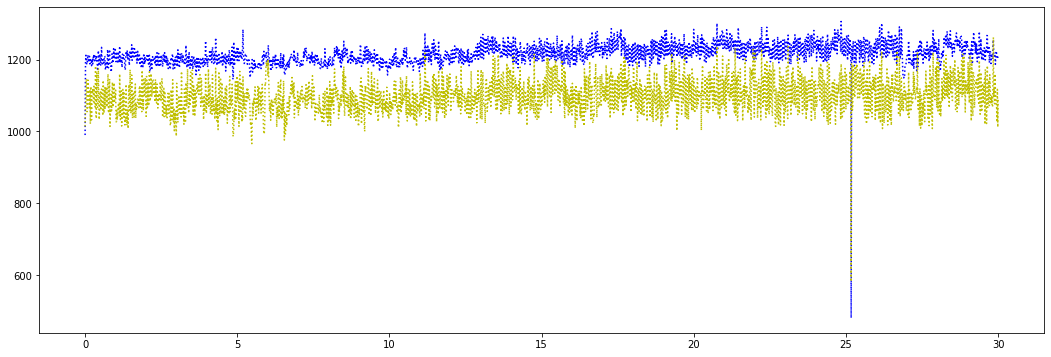

In [100]:
plt.figure(figsize=(18,6))
plt.plot(x, np.c_[df_100['MLII']],'b:')
plt.plot(x, np.c_[df_100['V5']],'y:')